In [25]:
import pandas as pd
import numpy as np

In [26]:
inputs = r"C:/Users/pawanc/Desktop/retailAnalytics/retailChurnAnalytics/inputs/"
dashdata = r"C:/Users/pawanc/Desktop/retailAnalytics/retailChurnAnalytics/dashBoardData/"
userdata = pd.read_csv(inputs+"userData.csv")
userdata.head()

,UserId,Age,Gender,UserType,Address
0,204041,36,M,Value,ME
1,1643825,24,F,Value,FL
2,1813716,20,F,Fast,CA
3,2099461,26,M,Inspiration,GA
4,303768,20,F,Fast,CA


In [27]:
actdata = pd.read_csv(inputs+"activityData.csv")
actdata.head()

,TransactionId,Timestamp,UserId,ItemId,Quantity,Value,Location,ProductCategory
0,817748,2000-11-01,1704130,28177481,2,47,Los Angeles,Apparels
1,818084,2000-11-01,1704130,28180841,2,60,West Hollywood,Consumer Electronics
2,818108,2000-11-01,1704130,28181081,2,36,Dodgertown,Footwear
3,818154,2000-11-01,1704130,28181541,3,49,Playa Vista,Food
4,828301,2000-11-03,1704130,28283011,2,111,Bell Gardens,Health & Beauty Supplements


In [28]:
all_featData = pd.read_csv(inputs+'allFeaturesData_.csv')
recency_df = all_featData[['UserId','Recency','Label']]
recency_df

,UserId,Recency,Label
0,204041,71,Nonchurner
1,1643825,4,Nonchurner
2,303768,19,Nonchurner
3,478503,15,Churner
4,348509,10,Churner
...,...,...,...
9145,2156171,70,Churner
9146,1649728,17,Nonchurner
9147,1695008,3,Nonchurner
9148,1703963,1,Nonchurner


In [29]:
freq_df = actdata.groupby(['UserId'])['TransactionId'].count().reset_index()
freq_df

,UserId,TransactionId
0,1114,18
1,1251,14
2,1824,14
3,4948,36
4,4979,23
...,...,...
9986,2179316,2
9987,2179347,15
9988,2179415,36
9989,2179470,7


In [30]:
mont_df = actdata.groupby(['UserId'])['Value'].sum().reset_index()
mont_df

,UserId,Value
0,1114,2248
1,1251,1597
2,1824,2621
3,4948,3399
4,4979,2468
...,...,...
9986,2179316,379
9987,2179347,3582
9988,2179415,5029
9989,2179470,1713


In [31]:
actdata = pd.merge(actdata, recency_df, on='UserId',how='left')
actdata

,TransactionId,Timestamp,UserId,ItemId,Quantity,Value,Location,ProductCategory,Recency,Label
0,817748,2000-11-01,1704130,28177481,2,47,Los Angeles,Apparels,7.0,Nonchurner
1,818084,2000-11-01,1704130,28180841,2,60,West Hollywood,Consumer Electronics,7.0,Nonchurner
2,818108,2000-11-01,1704130,28181081,2,36,Dodgertown,Footwear,7.0,Nonchurner
3,818154,2000-11-01,1704130,28181541,3,49,Playa Vista,Food,7.0,Nonchurner
4,828301,2000-11-03,1704130,28283011,2,111,Bell Gardens,Health & Beauty Supplements,7.0,Nonchurner
...,...,...,...,...,...,...,...,...,...,...
251968,1629847,2001-02-28,2179347,216298471,2,721,Bessemer,Consumer Electronics,NaN,NaN
251969,1629999,2001-02-28,2179347,216299991,5,157,Blountsville,Footwear,NaN,NaN
251970,1630931,2001-02-28,2179347,216309311,5,781,Bon Air,Apparels,NaN,NaN
251971,1631595,2001-02-28,2179347,216315951,2,71,Bremen,Consumer Electronics,NaN,NaN


In [32]:
actdata = pd.merge(actdata, freq_df, on='UserId',how='left')
actdata.rename(columns={'TransactionId_y':'Frequency'}, inplace=True)
actdata.rename(columns={'TransactionId_x':'TransactionId'}, inplace=True)
actdata

,TransactionId,Timestamp,UserId,ItemId,Quantity,Value,Location,ProductCategory,Recency,Label,Frequency
0,817748,2000-11-01,1704130,28177481,2,47,Los Angeles,Apparels,7.0,Nonchurner,64
1,818084,2000-11-01,1704130,28180841,2,60,West Hollywood,Consumer Electronics,7.0,Nonchurner,64
2,818108,2000-11-01,1704130,28181081,2,36,Dodgertown,Footwear,7.0,Nonchurner,64
3,818154,2000-11-01,1704130,28181541,3,49,Playa Vista,Food,7.0,Nonchurner,64
4,828301,2000-11-03,1704130,28283011,2,111,Bell Gardens,Health & Beauty Supplements,7.0,Nonchurner,64
...,...,...,...,...,...,...,...,...,...,...,...
251968,1629847,2001-02-28,2179347,216298471,2,721,Bessemer,Consumer Electronics,NaN,NaN,15
251969,1629999,2001-02-28,2179347,216299991,5,157,Blountsville,Footwear,NaN,NaN,15
251970,1630931,2001-02-28,2179347,216309311,5,781,Bon Air,Apparels,NaN,NaN,15
251971,1631595,2001-02-28,2179347,216315951,2,71,Bremen,Consumer Electronics,NaN,NaN,15


In [33]:
actdata = pd.merge(actdata, mont_df, on='UserId',how='left')
actdata.rename(columns={'Value_y':'Monetory'}, inplace=True)
actdata.rename(columns={'Value_x':'Value'}, inplace=True)
actdata.dropna(inplace=True)
actdata.reset_index(drop=True, inplace=True)
actdata

,TransactionId,Timestamp,UserId,ItemId,Quantity,Value,Location,ProductCategory,Recency,Label,Frequency,Monetory
0,817748,2000-11-01,1704130,28177481,2,47,Los Angeles,Apparels,7.0,Nonchurner,64,5879
1,818084,2000-11-01,1704130,28180841,2,60,West Hollywood,Consumer Electronics,7.0,Nonchurner,64,5879
2,818108,2000-11-01,1704130,28181081,2,36,Dodgertown,Footwear,7.0,Nonchurner,64,5879
3,818154,2000-11-01,1704130,28181541,3,49,Playa Vista,Food,7.0,Nonchurner,64,5879
4,828301,2000-11-03,1704130,28283011,2,111,Bell Gardens,Health & Beauty Supplements,7.0,Nonchurner,64,5879
...,...,...,...,...,...,...,...,...,...,...,...,...
245025,1523672,2001-02-02,2055375,215236721,2,133,Alton,Consumer Electronics,5.0,Churner,9,492
245026,1523768,2001-02-02,2055375,215237681,2,25,Arab,Footwear,5.0,Churner,9,492
245027,1520420,2001-02-01,2050097,215204201,2,86,Moody,Apparels,6.0,Nonchurner,2,120
245028,1624318,2001-02-27,2050097,216243181,2,34,Adamsville,Consumer Electronics,6.0,Nonchurner,2,120


In [34]:
actdata = pd.merge(actdata, userdata[['UserId','Gender','Age','UserType',	'Address']], on='UserId', how='left')
actdata.dropna(inplace=True)
actdata.reset_index(drop=True, inplace=True)
actdata

,TransactionId,Timestamp,UserId,ItemId,Quantity,Value,Location,ProductCategory,Recency,Label,Frequency,Monetory,Gender,Age,UserType,Address
0,817748,2000-11-01,1704130,28177481,2,47,Los Angeles,Apparels,7.0,Nonchurner,64,5879,F,20,Fast,CA
1,818084,2000-11-01,1704130,28180841,2,60,West Hollywood,Consumer Electronics,7.0,Nonchurner,64,5879,F,20,Fast,CA
2,818108,2000-11-01,1704130,28181081,2,36,Dodgertown,Footwear,7.0,Nonchurner,64,5879,F,20,Fast,CA
3,818154,2000-11-01,1704130,28181541,3,49,Playa Vista,Food,7.0,Nonchurner,64,5879,F,20,Fast,CA
4,828301,2000-11-03,1704130,28283011,2,111,Bell Gardens,Health & Beauty Supplements,7.0,Nonchurner,64,5879,F,20,Fast,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245025,1523672,2001-02-02,2055375,215236721,2,133,Alton,Consumer Electronics,5.0,Churner,9,492,F,18,Fast,AL
245026,1523768,2001-02-02,2055375,215237681,2,25,Arab,Footwear,5.0,Churner,9,492,F,18,Fast,AL
245027,1520420,2001-02-01,2050097,215204201,2,86,Moody,Apparels,6.0,Nonchurner,2,120,F,18,Fast,AL
245028,1624318,2001-02-27,2050097,216243181,2,34,Adamsville,Consumer Electronics,6.0,Nonchurner,2,120,F,18,Fast,AL


In [35]:
xx = actdata[['UserId','Gender','UserType','Address','Recency','Frequency','Monetory','Label']]
xx.drop_duplicates(inplace=True)
xx.reset_index(drop=True, inplace=True)
xx

C:\Users\pawanc\AppData\Local\Temp\ipykernel_26936\451180660.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xx.drop_duplicates(inplace=True)


,UserId,Gender,UserType,Address,Recency,Frequency,Monetory,Label
0,1704130,F,Fast,CA,7.0,64,5879,Nonchurner
1,1187367,F,Fast,CA,4.0,77,6886,Nonchurner
2,2091236,F,Fast,CA,1.0,73,6906,Nonchurner
3,1062490,F,Fast,CA,0.0,357,107534,Nonchurner
4,2147240,F,Fast,CA,43.0,31,3023,Churner
...,...,...,...,...,...,...,...,...
9145,1918619,F,Fast,AL,4.0,1,31,Churner
9146,2120882,F,Fast,AL,5.0,14,956,Churner
9147,2055375,F,Fast,AL,5.0,9,492,Churner
9148,2050097,F,Fast,AL,6.0,2,120,Nonchurner


In [36]:
# age_group = {18:'18-21',20:'18-21',[18,19,20,21],'22-25':[22,23,24,25],'26-29':[26,27,28,29],'30-33':[30,31,32,33],'34-38':[34,35,36,37,38]}
age_grp = {18:'18-21', 20:'18-21', 22:'22-25', 24:'22-25', 26:'26-29', 28:'26-29', 30:'30-33', 32:'30-33', 34:'34-38', 36:'34-38', 38:'34-38'}

In [37]:
actdata['age_group'] = actdata['Age'].replace(age_grp)
actdata

actdata.to_excel(dashdata+'actdata.xlsx', index=False)

In [38]:
def churnrate(df):
    totalusr = len(df)
    lostusr = len(df[df['Label']=='Churner'])
    chrnrate = round((lostusr / totalusr)*100,2)
    return chrnrate


In [39]:
churnrateDf = actdata.groupby('age_group').apply(churnrate).reset_index()
churnrateDf.columns = ['age_group', 'churnrate']
churnrateDf

churnrateDf.to_excel(dashdata+'churnByAge.xlsx', index=False)

In [40]:
churnrateDf1 = actdata.groupby('Address').apply(churnrate).reset_index()
churnrateDf1.columns = ['Address', 'churnrate']
chrunRisk=[]
for val in churnrateDf1.churnrate.unique():
    if val <=25.00:
        chrunRisk.append('Low')
    elif (val>25) & (val<35):
        chrunRisk.append('Medium')
    else:
        chrunRisk.append('High')

churnrateDf1['chrunRisk'] = chrunRisk
churnrateDf1

churnrateDf1.to_excel(dashdata+'churnByRegion.xlsx', index=False)

In [41]:
churnrateDf2 = actdata.groupby('Timestamp').apply(churnrate).reset_index()
churnrateDf2.columns = ['Timestamp', 'churnrate']
churnrateDf2

churnrateDf2.to_excel(dashdata+'churnByDate.xlsx', index=False)

In [42]:
churnrateDf3 = actdata.groupby('Address')['Value'].sum().reset_index()
churnrateDf3.columns = ['Address', 'TotalValue']
churnrateDf3

churnrateDf3.to_excel(dashdata+'valueByRegion.xlsx', index=False)

In [43]:
churnrateDf4 = actdata[['UserId','Recency','Monetory']]
clusters = []
for idx in range(len(churnrateDf4.Recency)):
    if churnrateDf4.Recency[idx] <= 25:
        clusters.append('Low Recency')
    elif (churnrateDf4.Recency[idx] >25) & (churnrateDf4.Recency[idx] <=55):
        clusters.append('Mid Recency')
    else:
        clusters.append('High Recency')

churnrateDf4['clusters'] = clusters
churnrateDf4

churnrateDf4.to_excel(dashdata+'recencyMonetory.xlsx', index=False)

C:\Users\pawanc\AppData\Local\Temp\ipykernel_26936\2911716831.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churnrateDf4['clusters'] = clusters


c:\Users\pawanc\Anaconda3Py39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


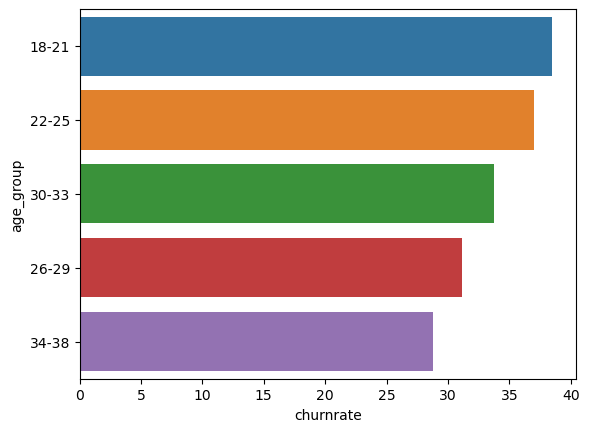

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
churnrateDf.sort_values('churnrate', ascending=False, inplace=True)

sns.barplot('churnrate', 'age_group', data=churnrateDf)
plt.show()

In [45]:
# churnrateDf4 = actdata[['UserId','Recency','Monetory','Address']]
# churnrateDf5 = pd.merge(churnrateDf4, churnrateDf1, on='Address', how='left')
# #churnrateDf5.drop_duplicates(inplace=True)
# #churnrateDf5.reset_index(drop=True, inplace=True)
# churnrateDf5

# churnrateDf5.to_excel(dashdata+'churnRateMonetory.xlsx', index=False)